In [51]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [52]:
# Importing all datasets
tele_data = pd.read_csv(r"C:\Users\deepi\Desktop\Data Science\Time Series\Group_Study_Telecom\telecom_churn_data.csv")
tele_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [53]:
tele_data.isnull().sum()/tele_data.shape[0]*100

mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.018010 
std_og_t2o_mou              1.018010 
loc_ic_t2o_mou              1.018010 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.601006 
last_date_of_month_8        1.100011 
last_date_of_month_9        1.659017 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
arpu_9                      0.000000 
onnet_mou_6                 3.937039 
onnet_mou_7                 3.859039 
onnet_mou_8                 5.378054 
onnet_mou_9                 7.745077 
offnet_mou_6                3.937039 
offnet_mou_7                3.859039 
offnet_mou_8                5.378054 
offnet_mou_9                7.745077 
roam_ic_mou_6               3.937039 
roam_ic_mou_7               3.859039 
roam_ic_mou_8               5.378054 
roam_ic_mou_9               7.745077 
roam_og_mou_6               3.937039 
roam_og_mou_

In [54]:
tele_data['total_rech_data_6'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_6'].fillna(0, inplace=True)
tele_data['total_rech_data_7'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_7'].fillna(0, inplace=True)
tele_data['total_rech_data_8'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_8'].fillna(0, inplace=True)
tele_data['total_rech_data_9'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_9'].fillna(0, inplace=True)

In [55]:
tele_data['total_data_rech_6'] = tele_data.total_rech_data_6 * tele_data.av_rech_amt_data_6
tele_data['total_data_rech_7'] = tele_data.total_rech_data_7 * tele_data.av_rech_amt_data_7

In [56]:
# Total recharge amount for June and July 
tele_data['amt_rech_6'] = tele_data.total_rech_amt_6 + tele_data.total_data_rech_6
tele_data['amt_rech_7'] = tele_data.total_rech_amt_7 + tele_data.total_data_rech_7

In [57]:
tele_avg_rech_67=tele_data[['amt_rech_6','amt_rech_7']].mean(axis = 1)
amt_70 = np.percentile(tele_avg_rech_67, 70)
print(amt_70)

478.0


In [68]:
highprofile = tele_data[tele_avg_rech_67 > amt_70]

In [69]:
highprofile = highprofile.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_rech_6', 'amt_rech_7'], axis=1)

In [70]:
highprofile.shape

(29953, 226)

In [71]:
highprofile.isnull().sum()/highprofile.shape[0]*100

mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              0.744500 
std_og_t2o_mou              0.744500 
loc_ic_t2o_mou              0.744500 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.090141 
last_date_of_month_8        0.550863 
last_date_of_month_9        1.218576 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
arpu_9                      0.000000 
onnet_mou_6                 1.809502 
onnet_mou_7                 1.789470 
onnet_mou_8                 3.912797 
onnet_mou_9                 6.336594 
offnet_mou_6                1.809502 
offnet_mou_7                1.789470 
offnet_mou_8                3.912797 
offnet_mou_9                6.336594 
roam_ic_mou_6               1.809502 
roam_ic_mou_7               1.789470 
roam_ic_mou_8               3.912797 
roam_ic_mou_9               6.336594 
roam_og_mou_6               1.809502 
roam_og_mou_

In [72]:
highprofile.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'], axis=1, inplace = True)

In [77]:
# Rename month named vbc columns to format 6,7,8 and 9

highprofile.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [78]:
highprofile['churn'] = highprofile.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [79]:
highprofile.shape

(29953, 203)

In [80]:
drop_9 =  highprofile.columns[highprofile.columns.str.contains('_9')]

In [81]:
# drop all columns corresponding to the churn phase
highprofile.drop(drop_9,axis=1,inplace=True)

In [82]:
highprofile.shape

(29953, 148)

In [83]:
highprofile.isnull().sum()/highprofile.shape[0]*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.744500
std_og_t2o_mou          0.744500
loc_ic_t2o_mou          0.744500
last_date_of_month_6    0.000000
last_date_of_month_7    0.090141
last_date_of_month_8    0.550863
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             1.809502
onnet_mou_7             1.789470
onnet_mou_8             3.912797
offnet_mou_6            1.809502
offnet_mou_7            1.789470
offnet_mou_8            3.912797
roam_ic_mou_6           1.809502
roam_ic_mou_7           1.789470
roam_ic_mou_8           3.912797
roam_og_mou_6           1.809502
roam_og_mou_7           1.789470
roam_og_mou_8           3.912797
loc_og_t2t_mou_6        1.809502
loc_og_t2t_mou_7        1.789470
loc_og_t2t_mou_8        3.912797
loc_og_t2m_mou_6        1.809502
loc_og_t2m_mou_7        1.789470
loc_og_t2m_mou_8        3.912797
loc_og_t2f_mou_6        1.809502
loc_og_t2f

In [84]:
# change data type to category
highprofile.churn = highprofile.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(highprofile.churn.value_counts()*100/highprofile.shape[0])

Churn Ratio:
0    91.877274
1    8.122726 
Name: churn, dtype: float64


In [85]:
highprofile.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'churn'],
      dtype='object', length=148)

In [ ]:
highprofile.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8",'last_date_of_month_6',"last_date_of_month_7","last_date_of_month_8"], axis=1, inplace=True)

In [92]:
highprofile.isnull().sum()/highprofile.shape[0]*100

mobile_number         0.000000
circle_id             0.000000
loc_og_t2o_mou        0.744500
std_og_t2o_mou        0.744500
loc_ic_t2o_mou        0.744500
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           1.809502
onnet_mou_7           1.789470
onnet_mou_8           3.912797
offnet_mou_6          1.809502
offnet_mou_7          1.789470
offnet_mou_8          3.912797
roam_ic_mou_6         1.809502
roam_ic_mou_7         1.789470
roam_ic_mou_8         3.912797
roam_og_mou_6         1.809502
roam_og_mou_7         1.789470
roam_og_mou_8         3.912797
loc_og_t2t_mou_6      1.809502
loc_og_t2t_mou_7      1.789470
loc_og_t2t_mou_8      3.912797
loc_og_t2m_mou_6      1.809502
loc_og_t2m_mou_7      1.789470
loc_og_t2m_mou_8      3.912797
loc_og_t2f_mou_6      1.809502
loc_og_t2f_mou_7      1.789470
loc_og_t2f_mou_8      3.912797
loc_og_t2c_mou_6      1.809502
loc_og_t2c_mou_7      1.789470
loc_og_t2c_mou_8      3.912797
loc_og_m

In [94]:
highprofile.shape

(29953, 142)

In [95]:
highprofile.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,

In [104]:
highprofile.drop(["circle_id"], axis=1, inplace=True)

In [105]:
highprofile.shape

(29953, 141)

In [108]:
highprofile.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,2.995300e+04,29730.0,29730.0,29730.0,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.00000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.0,29417.0,28781.0,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.00000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.0,29417.0,28781.0,29411.000000,29417.00000,28781.000000,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,7.001206e+09,0.0,0.0,0.0,558.820058,561.160547,508.890301,265.708886,272.935850,243.888097,380.688975,385.124799,348.769656,16.421142,12.876567,13.021785,27.086158,20.522

In [109]:
highprofile.drop(["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou","std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8",
                 "std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8"], axis=1, inplace=True)

In [110]:
highprofile.shape

(29953, 132)

In [113]:
highprofile.isnull().sum()

mobile_number         0   
arpu_6                0   
arpu_7                0   
arpu_8                0   
onnet_mou_6           542 
onnet_mou_7           536 
onnet_mou_8           1172
offnet_mou_6          542 
offnet_mou_7          536 
offnet_mou_8          1172
roam_ic_mou_6         542 
roam_ic_mou_7         536 
roam_ic_mou_8         1172
roam_og_mou_6         542 
roam_og_mou_7         536 
roam_og_mou_8         1172
loc_og_t2t_mou_6      542 
loc_og_t2t_mou_7      536 
loc_og_t2t_mou_8      1172
loc_og_t2m_mou_6      542 
loc_og_t2m_mou_7      536 
loc_og_t2m_mou_8      1172
loc_og_t2f_mou_6      542 
loc_og_t2f_mou_7      536 
loc_og_t2f_mou_8      1172
loc_og_t2c_mou_6      542 
loc_og_t2c_mou_7      536 
loc_og_t2c_mou_8      1172
loc_og_mou_6          542 
loc_og_mou_7          536 
loc_og_mou_8          1172
std_og_t2t_mou_6      542 
std_og_t2t_mou_7      536 
std_og_t2t_mou_8      1172
std_og_t2m_mou_6      542 
std_og_t2m_mou_7      536 
std_og_t2m_mou_8      1172
s

In [124]:
highprofile.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1, inplace=True)

In [126]:
highprofile.shape

(29953, 87)

In [129]:
highprofile.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,5.44,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,2.0,3.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0.0,2.0,2.0,0.00,0.48,0.01,0.00,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='arpu_6', ylabel='Density'>

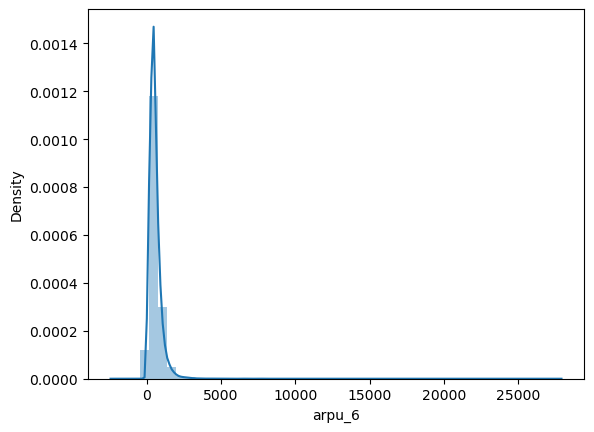

In [127]:
sns.distplot(highprofile.arpu_6)

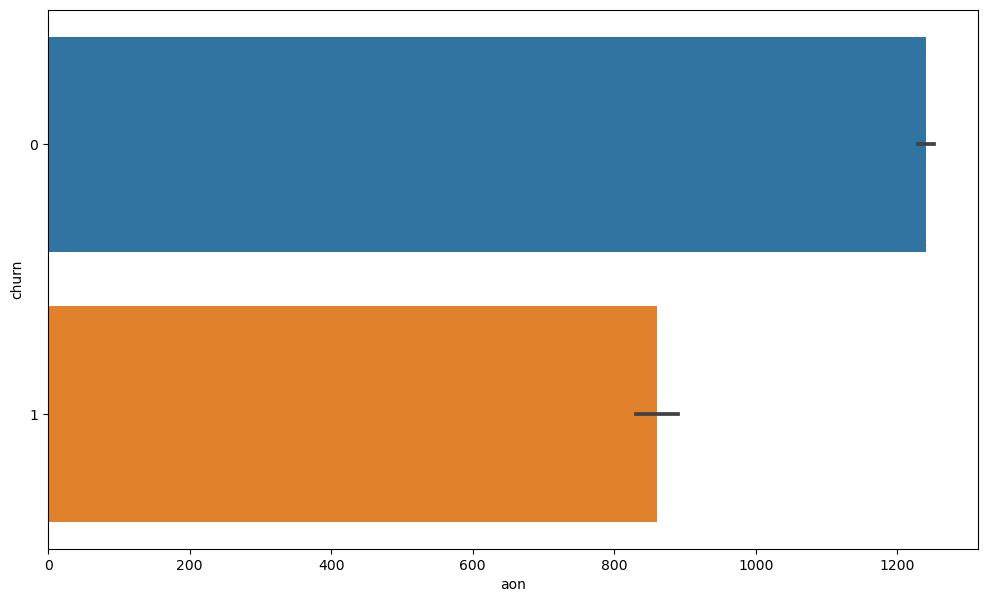

In [128]:
plt.figure(figsize=[12,7])
sns.barplot(x='aon',y='churn', data=highprofile)
plt.show()